# <h1 style="font-family: 'Roboto', sans-serif; font-size: 24px;">Machine Learning Project</h1>

# <h1 style="font-family: 'Roboto', sans-serif; font-size: 24px;">Laod the data</h1>

In [ ]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/refs/heads/master/heart-disease-cleveland.csv')
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


# <h1 style="font-family: 'Roboto', sans-serif; font-size: 24px;">Data Preparation</h1>

## <h2 style="font-family: 'Roboto', sans-serif; font-size: 16px;">Data Cleaning</h2>

In [ ]:
df.columns

Index(['age', ' sex', ' cp', ' trestbps', ' chol', ' fbs', ' restecg',
       ' thalach', ' exang', ' oldpeak', ' slope', ' ca', ' thal',
       ' diagnosis'],
      dtype='object')

In [ ]:
df.columns = df.columns.str.lstrip()
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'diagnosis'],
      dtype='object')

In [ ]:
df.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


In [ ]:
print(df['ca'].unique())
print(df['thal'].unique())

['0.0' '3.0' '2.0' '1.0' '?']
['6.0' '3.0' '7.0' '?']


In [ ]:
import numpy as np

df['ca'] = df['ca'].replace('?', np.nan)
df['ca'] = pd.to_numeric(df['ca'], errors='coerce')

df['thal'] = df['thal'].replace('?', np.nan)
df['thal'] = pd.to_numeric(df['thal'], errors='coerce')

In [ ]:
df = df.dropna()
df.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


## <h2 style="font-family: 'Roboto', sans-serif; font-size: 14px;">Separating the data as X and y</h2>


In [ ]:
y = df['diagnosis']
y

,diagnosis
0,0
1,2
2,1
3,0
4,0
...,...
297,1
298,1
299,2
300,3


In [ ]:
X = df.drop('diagnosis', axis=1)
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,4,140,241,0,0,123,1,0.2,2,0.0,7.0
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0


## <h2 style="font-family: 'Roboto', sans-serif; font-size: 16px;">Data splitting </h2>

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [ ]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
119,65,1,4,135,254,0,2,127,0,2.8,2,1.0,7.0
292,44,1,4,120,169,0,0,144,1,2.8,3,0.0,6.0
59,51,1,1,125,213,0,2,125,1,1.4,1,1.0,3.0
69,46,1,3,150,231,0,0,147,0,3.6,2,0.0,3.0
161,77,1,4,125,304,0,2,162,1,0.0,1,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,60,1,3,140,185,0,2,155,0,3.0,2,0.0,3.0
53,44,1,2,130,219,0,2,188,0,0.0,1,0.0,3.0
79,58,1,4,150,270,0,2,111,1,0.8,1,0.0,7.0
284,61,1,4,148,203,0,0,161,0,0.0,1,1.0,7.0


In [ ]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
223,53,1,4,123,282,0,0,95,1,2.0,2,2.0,7.0
140,59,1,2,140,221,0,0,164,1,0.0,1,0.0,3.0
226,47,1,4,112,204,0,0,143,0,0.1,1,0.0,3.0
177,56,1,4,132,184,0,2,105,1,2.1,2,1.0,6.0
232,49,1,3,118,149,0,2,126,0,0.8,1,3.0,3.0
135,55,0,2,135,250,0,2,161,0,1.4,2,0.0,3.0
129,62,0,4,124,209,0,0,163,0,0.0,1,0.0,3.0
89,51,0,3,130,256,0,2,149,0,0.5,1,0.0,3.0
27,66,0,1,150,226,0,0,114,0,2.6,3,0.0,3.0
296,59,1,4,164,176,1,2,90,0,1.0,2,2.0,6.0


In [ ]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (237, 13)
y_train shape: (237,)
X_test shape: (60, 13)
y_test shape: (60,)


# <h1 style="font-family: 'Roboto', sans-serif; font-size: 24px;">Model Building</h1>

## <h2 style="font-family: 'Roboto', sans-serif; font-size: 16px;">Linear Regression</h2>

### <h3 style="font-family: 'Roboto', sans-serif; font-size: 14px;">Training the model</h3>

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

### <h3 style="font-family: 'Roboto', sans-serif; font-size: 14px;">Applying the model to make a prediction</h3>

In [ ]:
y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)

In [ ]:
print(y_lr_train_pred)

[ 2.07964128  1.66061044  0.81661023  0.78918821  1.84865503  0.04001404
  0.32348598  2.03973295  0.02437289  2.78911852  0.6852664  -0.05216778
  0.17475995  1.65259888  1.70728283  1.89361187  2.03855784  1.63716511
  0.80793806  1.77765008  0.01741333  0.25494099  0.88953267 -0.4774165
  0.52766416  0.25712931  1.96305029  0.98553977  0.43085723  0.57705333
  2.41395864  0.31976887  0.17436904  0.44786338  0.67956617  1.82982853
  2.20946275  2.66821619  0.02054695  0.98202528  1.49336692  0.05485977
  3.15132113  2.10734093  0.27054283  1.20810148  2.26963922  0.98264393
  2.933495   -0.11086425  1.57341977  1.98165411  1.64830345  0.23514462
  1.35451915 -0.07740637  1.37420624  0.47918349  2.76222392  2.76761688
 -0.32256069 -0.18641826  0.33837249  2.49611149  0.36904946  0.58670785
  2.39750419  0.21563557  0.53569193  0.18039071  0.66316171  0.15656018
  2.03813371  1.19900651  0.08047186  2.71763932  0.62492259  0.21078987
  2.26467086 -0.25608756  0.77329739  1.00248332  1.

In [ ]:
print(y_lr_test_pred)

[ 2.62894286  0.02893768  0.30872144  2.39393446  1.87258158  0.1103663
 -0.06003947  0.17173684  0.26200521  2.67033596  1.73504538  0.16326789
  0.98695486 -0.44885599 -0.01360375 -0.04976004  2.68885267  0.36747946
  1.19551878  2.17896717  0.58923508 -0.28495622 -0.08922241  2.76507812
  0.65345094  0.94065287  0.6613139   1.31179743  1.59430981  2.07936722
  1.54748836  1.20591455  0.21570396  1.94525936 -0.47888135  1.16503063
 -0.62494396  1.45015242  0.21758138 -0.11425529  0.2470878   3.2004657
  1.2449256  -0.0247847   0.05572587 -0.05568949  0.7303852   1.01503969
  3.21111183 -0.01568559  1.78403412  1.79578817  2.87213974  1.83253191
  0.43403638  2.29732099  0.95074335 -0.27918323  0.16370876  0.43869171]


###<h3 style="font-family: 'Roboto', sans-serif; font-size: 14px;">Evaluate Model Performance</h3>


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)


In [ ]:
print('LR MSE (Train):', lr_train_mse)
print('LR R2 (Train):', lr_train_r2)
print('LR MSE (Test):', lr_test_mse)
print('LR R2 (Test):', lr_test_r2)

LR MSE (Train): 0.6845827613620552
LR R2 (Train): 0.5487875014909025
LR MSE (Test): 0.623014849065675
LR R2 (Test): 0.5910186986439772


In [ ]:
lr_results = pd.DataFrame(['Linear Regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Testing MSE','Testing R2']

In [ ]:
lr_results

,Method,Training MSE,Training R2,Testing MSE,Testing R2
0,Linear Regression,0.684583,0.548788,0.623015,0.591019


## <h2 style="font-family: 'Roboto', sans-serif; font-size: 16px;">Random Forest</h2>

### <h3 style="font-family: 'Roboto', sans-serif; font-size: 14px;">Training the model</h3>

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

### <h3 style="font-family: 'Roboto', sans-serif; font-size: 14px;">Applying the model to make a prediction</h3>

In [ ]:
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

###<h3 style="font-family: 'Roboto', sans-serif; font-size: 14px;">Evaluate Model Performance</h3>

In [ ]:
rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)


In [ ]:
rf_results = pd.DataFrame(['Random Forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Training MSE', 'Training R2', 'Testing MSE','Testing R2']

In [ ]:
rf_results

,Method,Training MSE,Training R2,Testing MSE,Testing R2
0,Random Forest,0.11749,0.922561,0.662683,0.564978


## <h2 style="font-family: 'Roboto', sans-serif; font-size: 16px;">Model Comparison</h2>

In [ ]:
df_models = pd.concat([lr_results, rf_results], axis = 0).reset_index(drop=True)

df_models

,Method,Training MSE,Training R2,Testing MSE,Testing R2
0,Linear Regression,0.684583,0.548788,0.623015,0.591019
1,Random Forest,0.11749,0.922561,0.662683,0.564978


# <h1 style="font-family: 'Roboto', sans-serif; font-size: 24px;">Data visualization of prediction results</h1>

Text(0.5, 0, 'Predicted Diagnosis')

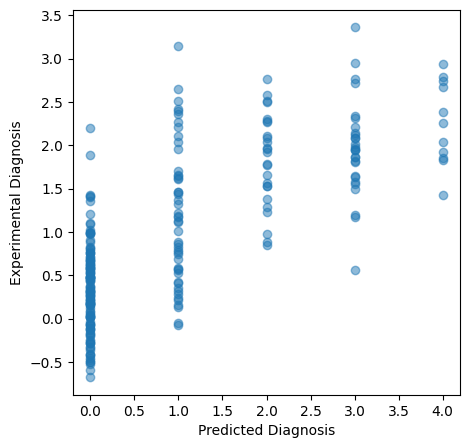

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))

plt.scatter(x=y_train, y=y_lr_train_pred, alpha= 0.5)

plt.plot
plt.ylabel('Actual values')
plt.xlabel('Predicted values')

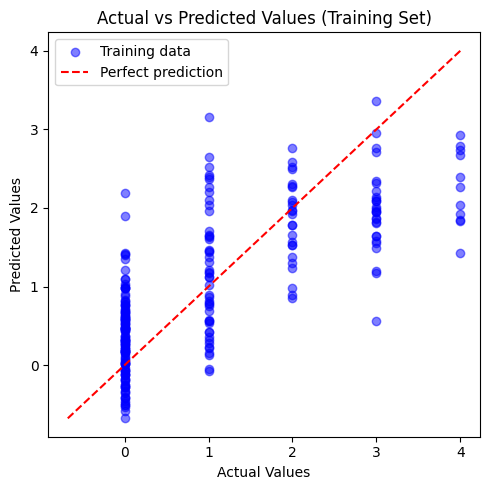

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5, 5))

# Scatter plot of actual vs predicted values
plt.scatter(y_train, y_lr_train_pred, alpha=0.5, color='blue', label='Training data')

# Perfect prediction line
min_val = min(y_train.min(), y_lr_train_pred.min())
max_val = max(y_train.max(), y_lr_train_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect prediction')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Training Set)')
plt.legend()

plt.tight_layout()
plt.show()

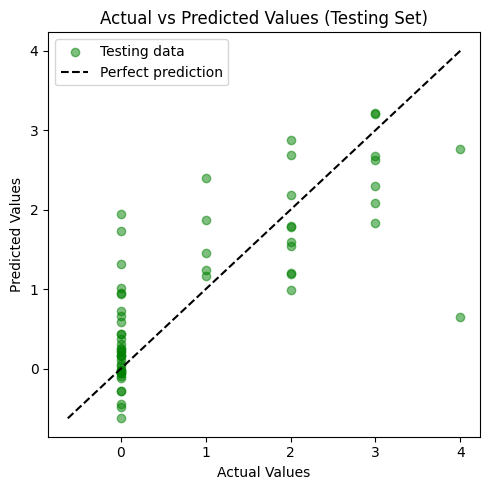

In [ ]:
plt.figure(figsize=(5, 5))

# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_lr_test_pred, alpha=0.5, color='green', label='Testing data')

# Perfect prediction line
min_val = min(y_test.min(), y_lr_test_pred.min())
max_val = max(y_test.max(), y_lr_test_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='--', label='Perfect prediction')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Testing Set)')
plt.legend()

plt.tight_layout()
plt.show()